## About Delhivery

#### Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

#### The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### Objective
#### The company wants to understand and process the data coming out of data engineering pipelines:

#### • Clean, sanitize and manipulate data to get useful features out of raw fields

#### • Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("delhivery_data.csv")

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [6]:
df.shape

(144867, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [9]:
df.describe(include="all")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867.000000,144867,144867.000000,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,NaN,2,NaN,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,NaN,True,NaN,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,NaN,118749,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,961.262986,NaN,232.926567,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1037.012769,NaN,344.755577,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,9.000000,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.000000,NaN,22.000000,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.000000,NaN,66.000000,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1634.000000,NaN,286.000000,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [10]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [11]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [12]:
#converting to datetime
df["creation_time"] = pd.to_datetime(df["trip_creation_time"])

In [13]:
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [14]:
df["day_creation"]=df["creation_time"].dt.day_name()

In [15]:
df["month_creation"] = (df["creation_time"].dt.month_name())
df["year_creation"] = (df["creation_time"].dt.year)

In [16]:
df["creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: creation_time, dtype: int64

In [17]:
df["creation_time"].dt.year.value_counts()

2018    144867
Name: creation_time, dtype: int64

In [18]:
df["route_type"].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [19]:
df["data"].value_counts()

training    104858
test         40009
Name: data, dtype: int64

<AxesSubplot:ylabel='route_type'>

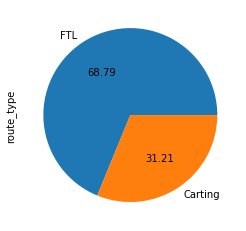

In [20]:
df["route_type"].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='day_creation'>

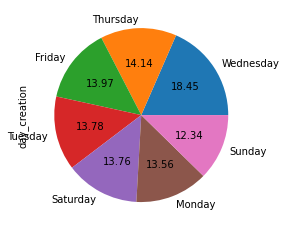

In [21]:
df["day_creation"].value_counts().plot(kind="pie",autopct="%.2f")

In [22]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

<AxesSubplot:ylabel='route_type'>

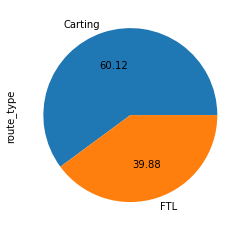

In [23]:
df.groupby("trip_uuid")["route_type"].unique().reset_index()["route_type"].apply(lambda x:x[0]).value_counts().plot(kind="pie",autopct="%.2f")

In [24]:
#extracting names of cities and states
df["city_source_name"] = df["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]

In [25]:
df["state_source_name"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

C:\Users\Juee\AppData\Local\Temp/ipykernel_153672/2767146989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["state_source_name"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [26]:
df["place_source_name"] = df["source_name"].str.split("_",n=2,expand=True)[1]

In [27]:
df["city_dest_name"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["place_dest_name"] = df["destination_name"].str.split("_",n=2,expand=True)[1]
df["state_dest_name"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

C:\Users\Juee\AppData\Local\Temp/ipykernel_153672/2753477323.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["state_dest_name"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [28]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,creation_time,day_creation,month_creation,year_creation,city_source_name,state_source_name,place_source_name,city_dest_name,place_dest_name,state_dest_name
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,2018-09-20 02:35:36.476840,Thursday,September,2018,Anand,Gujarat,VUNagar,Khambhat,MotvdDPP,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,2018-09-20 02:35:36.476840,Thursday,September,2018,Anand,Gujarat,VUNagar,Khambhat,MotvdDPP,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,2018-09-20 02:35:36.476840,Thursday,September,2018,Anand,Gujarat,VUNagar,Khambhat,MotvdDPP,Gujarat


In [29]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60 #converting into hours

In [30]:
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60

In [31]:
#calculating total difference of start and end od time
df["total_start_end_time_diff"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,"h")) 

In [32]:
df.dtypes

data                                      object
trip_creation_time                        object
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [33]:
df.isna().sum()

data                                 0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
trip_uuid                            0
source_center                        0
source_name                        293
destination_center                   0
destination_name                   261
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan               0
is_cutoff                            0
cutoff_factor                        0
cutoff_timestamp                     0
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
factor                               0
segment_actual_time                  0
segment_osrm_time                    0
segment_osrm_distance                0
segment_factor                       0
creation_time                        0
day_creation             

In [35]:
df["state_source_name"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Uttarakhand', 'Tamil Nadu', 'Rajasthan', nan, 'Telangana',
       'Madhya Pradesh', 'Uttar Pradesh', 'Himachal Pradesh', 'Kerala',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Hub Maharashtra', 'Assam',
       'West Bengal', 'Orissa', 'Delhi', 'Nagar_DC Rajasthan',
       'Jammu & Kashmir', 'Alipore_DPC West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Vadgaon Sheri DPC Maharashtra', 'Goa',
       '02_DPC Uttar Pradesh', 'MP Nagar Madhya Pradesh', 'Road Punjab',
       'Pondicherry', 'Layout PC Karnataka', 'Mandakni Madhya Pradesh',
       'Dadra and Nagar Haveli', 'DC Maharashtra', 'Arunachal Pradesh',
       'Antop Hill Maharashtra', 'City Madhya Pradesh',
       'Pashan DPC Maharashtra', 'Nagaland', 'Meghalaya', 'DC Rajasthan',
       'West _Dc Maharashtra', 'Nagar Uttar Pradesh',
       '_NAD Andhra Pradesh', 'Avenue_DPC West Bengal', 'Tripura',
       'Mizoram', 'Rahatani DPC Maharashtra', 'Balaji Naga

In [36]:
#replacing a few state names
df["state_source_name"].replace({"Hub Maharashtra": "Maharashtra", "Nagar_DC Rajasthan": "Rajasthan","Alipore_DPC West Bengal":"West Bengal","Vadgaon Sheri DPC Maharashtra":"Maharashtra","02_DPC Uttar Pradesh":"Uttar Pradesh","MP Nagar Madhya Pradesh":"Madhya Pradesh","Road Punjab":"Punjab","Layout PC Karnataka":"Karnataka","Mandakni Madhya Pradesh":"Madhya Pradesh","DC Maharashtra":"Maharashtra","Antop Hill Maharashtra":"Maharashtra","City Madhya Pradesh":"Madhya Pradesh","Pashan DPC Maharashtra":"Maharashtra","DC Rajasthan":"Rajasthan","West _Dc Maharashtra":"Maharashtra","Nagar Uttar Pradesh":"Uttar Pradesh","_NAD Andhra Pradesh":"Andhra Pradesh","Avenue_DPC West Bengal'":"West Bengal","Rahatani DPC Maharashtra":"Maharashtra","Balaji Nagar Maharashtra":"Maharashtra","Goa Goa":"Goa","Kothanur_L Karnataka":"Karnataka","Mahim Maharashtra":"Maharashtra"})

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: state_source_name, Length: 144867, dtype: object

In [37]:
df["state_dest_name"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Kerala', 'Punjab',
       'Uttarakhand', 'Tamil Nadu', 'Haryana', 'Rajasthan', nan,
       'Telangana', 'Uttar Pradesh', 'Delhi', 'Himachal Pradesh',
       'Hub Maharashtra', 'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Assam',
       'Orissa', 'West Bengal', 'Pashan DPC Maharashtra',
       'Jammu & Kashmir', 'Madhya Pradesh', 'Avenue_DPC West Bengal',
       'Chandigarh', 'Chhattisgarh', 'Vadgaon Sheri DPC Maharashtra',
       '02_DPC Uttar Pradesh', 'Goa', 'MP Nagar Madhya Pradesh',
       'Pondicherry', 'Layout PC Karnataka', 'Mandakni Madhya Pradesh',
       'Arunachal Pradesh', 'Dadra and Nagar Haveli',
       'Nagar_DC Rajasthan', 'West _Dc Maharashtra',
       'Alipore_DPC West Bengal', 'Meghalaya', 'Rahatani DPC Maharashtra',
       'Nagar Uttar Pradesh', 'Kothanur_L Karnataka',
       'City Madhya Pradesh', 'Balaji Nagar Maharashtra', 'Tripura',
       'Mizoram', 'Daman & Diu', 'Nagaland', 'Goa Goa',
       'Antop Hill Maharashtra',

In [38]:
df["state_dest_name"].replace({"Pashan DPC Maharashtra":"Maharashtra","Avenue_DPC West Bengal":"West Bengal","Vadgaon Sheri DPC Maharashtra":"Maharashtra","02_DPC Uttar Pradesh":"Uttar Pradesh", "MP Nagar Madhya Pradesh":"Madhya Pradesh", "Layout PC Karnataka":"Karnataka","Mandakni Madhya Pradesh":"Madhya Pradesh","Nagar_DC Rajasthan":"Rajasthan","West_Dc Maharashtra":"Maharashtra","Alipore_DPC West Bengal":"West Bengal","Rahatani DPC Maharashtra":"Maharashtra","Nagar Uttar Pradesh":"Uttar Pradesh","Goa Goa":"Goa","City Madhya Pradesh":"Madhya Pradesh", "West _Dc Maharashtra":"Maharashtra","DC Rajasthan":"Rajasthan","Antop Hill Maharashtra":"Maharashtra", "Balaji Nagar Maharashtra":"Maharashtra","Kothanur_L Karnataka":"Karnataka","Mahim Maharashtra":"Maharashtra","DC Maharashtra":"Maharashtra","_NAD Andhra Pradesh":"Andhra Pradesh","Delhi Delhi":"Delhi","Hub Maharashtra":"Maharashtra"})

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: state_dest_name, Length: 144867, dtype: object

In [39]:
df["city_dest_name"].replace({"Bangalore":"Bengaluru","del":"Delhi"},inplace=True)

In [40]:
df["city_source_name"].replace({"Bangalore":"Bengaluru","AMD":"Ahmedabad","Amdavad":"Ahmedabad"},inplace=True)

In [41]:
#dropping a few unnecessary columns
df.drop(["trip_creation_time","destination_center","cutoff_timestamp","od_end_time","od_start_time"],axis=1,inplace=True)

In [42]:
df1=df.copy() #copying the dataframe for further analysis

In [43]:
actual_time = df1.groupby(["trip_uuid","start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()
segment_osrm_time = df1[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_actual_time = df1.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
osrm_time = df1.groupby(["trip_uuid","start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()

In [44]:
total_start_end_time_diff = df1.groupby("trip_uuid")["total_start_end_time_diff"].unique().reset_index()
total_start_end_time_diff["total_start_end_time_diff"] = total_start_end_time_diff["total_start_end_time_diff"].apply(sum)

In [45]:
start_scan_to_end_scan = ((df1.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum) 

In [46]:
osrm_distance = df1.groupby(["trip_uuid","start_scan_to_end_scan"])["osrm_distance"].agg(max).reset_index().groupby("trip_uuid")["osrm_distance"].agg(sum).reset_index()

In [47]:
actual_distance_to_destination = df1.groupby(["trip_uuid","start_scan_to_end_scan"])["actual_distance_to_destination"].agg(max).reset_index().groupby("trip_uuid")["actual_distance_to_destination"].agg(sum).reset_index()
segment_osrm_distance = df1[["trip_uuid","segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].agg(sum).reset_index()
a=segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,on="trip_uuid"),on="trip_uuid")
a1=segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(total_start_end_time_diff.merge(start_scan_to_end_scan,on="trip_uuid",),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

In [48]:
df2=a.merge(a1,on="trip_uuid")

In [49]:
df2.head(3)

,trip_uuid,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan
0,trip-153671041653548748,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.65
1,trip-153671042288605164,84.1894,73.186911,85.1110,1.083333,1.133333,2.350000,2.383333,3.026865,3.00
2,trip-153671043369099517,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.55


In [50]:
x=df1.groupby("trip_uuid")[["city_source_name","city_dest_name"]].aggregate({"city_source_name":pd.unique,"city_dest_name":pd.unique})

In [51]:
x1=df1.groupby("trip_uuid")[["state_source_name","state_dest_name"]].aggregate({"state_source_name":pd.unique,"state_dest_name":pd.unique})

In [52]:
x2=x.merge(x1,on="trip_uuid",how="outer")

In [53]:
route_type=df1.groupby("trip_uuid")["route_type"].unique().reset_index()

In [54]:
df3=route_type.merge(x2.merge(df2,on="trip_uuid",how="outer"),on="trip_uuid",how="outer")
final_df= df3.copy()

In [55]:
final_df["route_type"] = final_df["route_type"].apply(lambda x:x[0])

In [56]:
route = df1.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()

In [57]:
final_df= final_df.merge(route,on="trip_uuid")

In [58]:
final_df.head(3)

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.65,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]",Karnataka,Karnataka,84.1894,73.186911,85.1110,1.083333,1.133333,2.350000,2.383333,3.026865,3.00,[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Karnataka, Haryana]","[Haryana, Punjab]",2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.55,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...


In [59]:
final_df["city_source_name"] = final_df["city_source_name"].astype("str").str.strip("[]").str.replace("'","")

In [60]:
final_df["city_dest_name"] = final_df["city_dest_name"].astype("str").str.strip("[]").str.replace("'","")
final_df["state_source_name"] = final_df["state_source_name"].astype("str").str.strip("[]").str.replace("'","")
final_df["state_dest_name"] = final_df["state_dest_name"].astype("str").str.strip("[]").str.replace("'","")
final_df

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Karnataka,Karnataka,84.1894,73.186911,85.1110,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Hub Maharashtra,Maharashtra,19.8766,17.175274,19.6800,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,[thanos::sroute:f0176492-a679-4597-8332-bbd1c7...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Karnataka,Karnataka,146.7919,127.448500,146.7918,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,[thanos::sroute:d9f07b12-65e0-4f3b-bec8-df0613...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Zirakpur Chandigarh,Punjab Chandigarh,Punjab,64.8551,57.762332,73.4630,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,[thanos::sroute:8a120994-f577-4491-9e4b-b7e4a1...
14813,trip-153861104386292051,Carting,FBD,Faridabad,Haryana,Haryana,16.0883,15.513784,16.0882,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,[thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b7576...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Uttar Pradesh,Uttar Pradesh,104.8866,38.684839,63.2841,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,[thanos::sroute:5609c268-e436-4e0a-8180-3db4a7...
14815,trip-153861115439069069,Carting,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tamil Nadu,Tamil Nadu,223.5324,134.723836,177.6635,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...


In [61]:
final_df.isna().sum()

trip_uuid                         0
route_type                        0
city_source_name                  0
city_dest_name                    0
state_source_name                 0
state_dest_name                   0
segment_osrm_distance             0
actual_distance_to_destination    0
osrm_distance                     0
segment_osrm_time                 0
osrm_time                         0
segment_actual_time               0
actual_time                       0
total_start_end_time_diff         0
start_scan_to_end_scan            0
route_schedule_uuid               0
dtype: int64

In [ ]:
#HYPOTHESIS TESTING--
#the difference between Point a and start_scan_to_end_scan
#H0: Average time taken between trip start and end time = Average of start and end scan time
#Ha: Average time taken between trip start and end time != Average of start and end scan time
#significance value=0.05

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


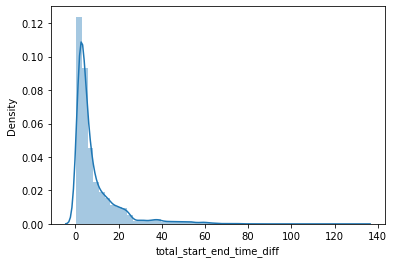

In [62]:
sns.distplot((total_start_end_time_diff["total_start_end_time_diff"]))
plt.show()

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


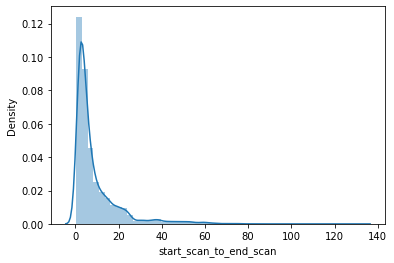

In [63]:
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))
plt.show()

In [64]:
from scipy.stats import levene
from scipy.stats import ttest_ind
levene(final_df["total_start_end_time_diff"],final_df["start_scan_to_end_scan"],center="mean")

LeveneResult(statistic=0.014231829436042518, pvalue=0.9050406855260207)

In [65]:
ttest_ind((final_df["total_start_end_time_diff"]),(final_df["start_scan_to_end_scan"]))

Ttest_indResult(statistic=0.2044583451654824, pvalue=0.8379967443378871)

In [ ]:
#p-value>0.05, we cannot reject the null hypothesis

In [ ]:
#Hypothesis testing-between actual_time aggregated value and OSRM time aggregated value
#H0: Average of Actual time<=Average of OSRM time
#Ha: Average of Actual time>Average of OSRM time

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

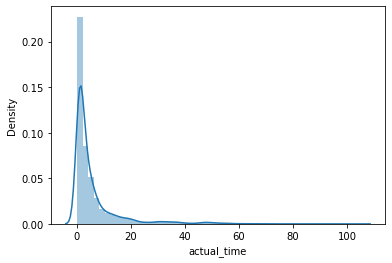

In [66]:
sns.distplot((final_df["actual_time"]))
plt.show

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

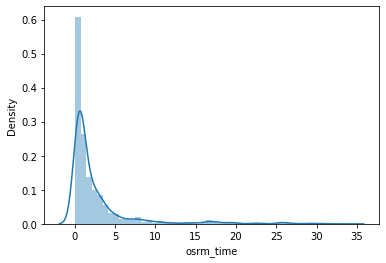

In [67]:
sns.distplot((final_df["osrm_time"]))
plt.show

In [68]:
ttest_ind((final_df["actual_time"]),(final_df["osrm_time"]))

Ttest_indResult(statistic=38.02171177971381, pvalue=6.763671976387653e-309)

In [ ]:
#Average actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not equal.
#actual time is higher than the osrm time
#We do not reject the null hypothesis

In [ ]:
#Hypothesis Testing-actual_time aggregated value and segment actual time aggregated value
#H0: Actual time = segment actual time
#Ha: Actual time != segment actual time

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

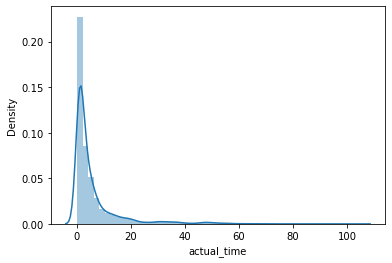

In [69]:
sns.distplot((final_df["actual_time"]))
plt.show

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

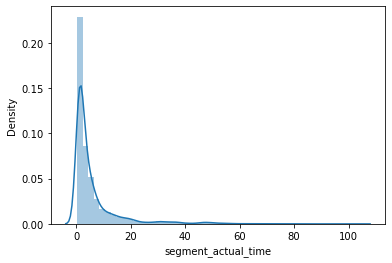

In [70]:
sns.distplot((final_df["segment_actual_time"]))
plt.show

In [71]:
levene(final_df["actual_time"],final_df["segment_actual_time"],center="mean")

LeveneResult(statistic=0.24980282857796382, pvalue=0.6172176573154027)

In [72]:
ttest_ind((final_df["actual_time"]),(final_df["segment_actual_time"]))

Ttest_indResult(statistic=0.4341117159878627, pvalue=0.6642104787409114)

In [ ]:
#Actual Time taken to complete delivery trip and segment actual time are equal
#We do not reject the null hypothesis

In [ ]:
#Hypothesis Testing osrm distance aggregated value and segment osrm distance aggregated value
#H0 : OSRM distance>=Segment OSRM distance
#Ha : OSRM distance<Segment OSRM distance

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='osrm_distance', ylabel='Density'>

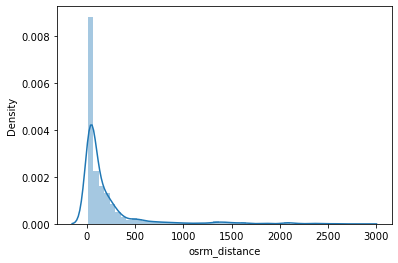

In [73]:
sns.distplot((final_df["osrm_distance"]))

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='segment_osrm_distance', ylabel='Density'>

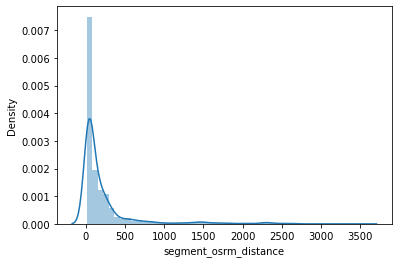

In [74]:
sns.distplot((final_df["segment_osrm_distance"]))

In [75]:
ttest_ind((final_df["osrm_distance"]),(final_df["segment_osrm_distance"]))

Ttest_indResult(statistic=-4.008239315564804, pvalue=6.13227024383113e-05)

In [ ]:
#We reject the null hypothesis

In [ ]:
#Hypothesis Testing-- osrm time aggregated value and segment osrm time aggregated value
#H0: OSRM time>=segment osrm time
#Ha: OSRM time<segment osrm time

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

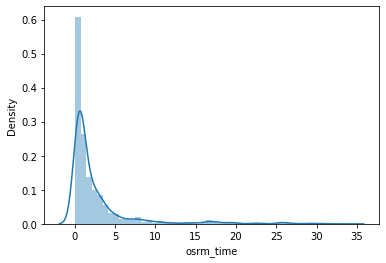

In [76]:
sns.distplot((final_df["osrm_time"]))

C:\Users\Juee\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='segment_osrm_time', ylabel='Density'>

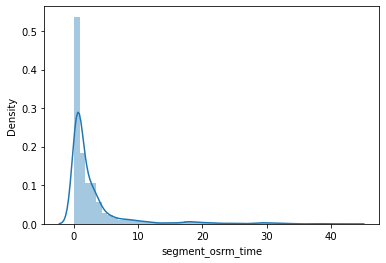

In [77]:
sns.distplot((final_df["segment_osrm_time"]))

In [78]:
ttest_ind((final_df["osrm_time"]),(final_df["segment_osrm_time"]))

Ttest_indResult(statistic=-5.591932105536473, pvalue=2.265333732526452e-08)

In [ ]:
#Average osrm time and Average segment osrm time are not equal
#We do not reject the null hypothesis

In [79]:
#Outliers Treatment
final_df.describe(include="all")

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
count,14817,14817,14817,14817,14817,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817
unique,14817,2,2087,2159,159,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504
top,trip-153671041653548748,Carting,Bengaluru,Bengaluru,Maharashtra,Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7...
freq,1,8908,1576,1521,2230,2104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
mean,NaN,NaN,NaN,NaN,NaN,NaN,223.201161,164.473322,204.836725,3.015830,2.697314,5.898205,5.945177,8.861857,8.835778,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,416.628374,305.540829,370.749275,5.242367,4.537654,9.270799,9.355548,10.981666,10.976286,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,9.072900,9.002461,9.072900,0.100000,0.100000,0.150000,0.150000,0.391024,0.383333,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.654500,22.856947,30.935900,0.516667,0.483333,1.100000,1.116667,2.498843,2.483333,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.154400,48.461876,65.852600,1.083333,1.000000,2.450000,2.483333,4.679427,4.650000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,218.802400,164.154696,208.417000,3.083333,2.816667,6.116667,6.133333,10.636651,10.583333,NaN


<AxesSubplot:ylabel='segment_osrm_distance'>

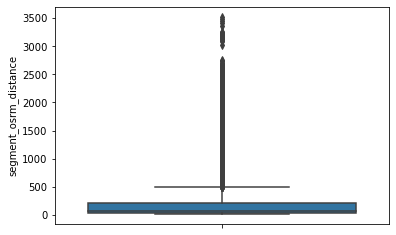

In [80]:
sns.boxplot(data=final_df, y="segment_osrm_distance")

<AxesSubplot:ylabel='actual_distance_to_destination'>

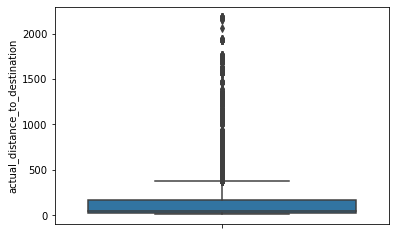

In [81]:
sns.boxplot(data=final_df, y="actual_distance_to_destination")

<AxesSubplot:ylabel='segment_osrm_distance'>

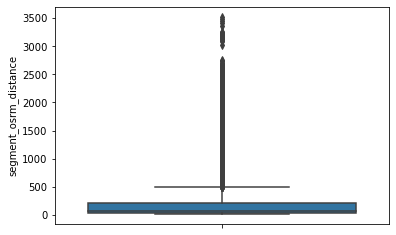

In [82]:
sns.boxplot(data=final_df, y="segment_osrm_distance")

<AxesSubplot:ylabel='osrm_distance'>

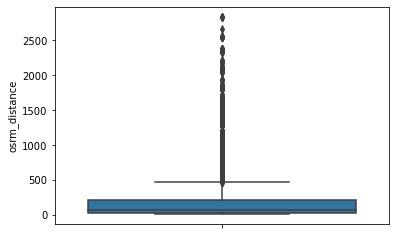

In [83]:
sns.boxplot(data=final_df, y="osrm_distance")

<AxesSubplot:ylabel='segment_osrm_time'>

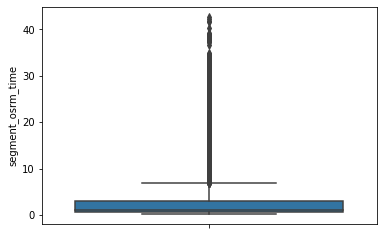

In [84]:
sns.boxplot(data=final_df, y=final_df["segment_osrm_time"])

<AxesSubplot:ylabel='osrm_time'>

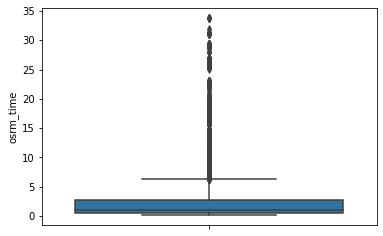

In [85]:
sns.boxplot(data=final_df, y="osrm_time")

<AxesSubplot:ylabel='segment_actual_time'>

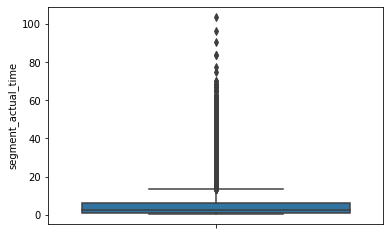

In [86]:
sns.boxplot(data=final_df, y="segment_actual_time")

<AxesSubplot:ylabel='actual_time'>

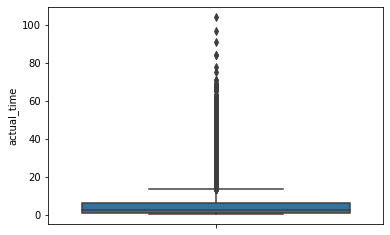

In [87]:
sns.boxplot(data=final_df, y="actual_time")

<AxesSubplot:ylabel='total_start_end_time_diff'>

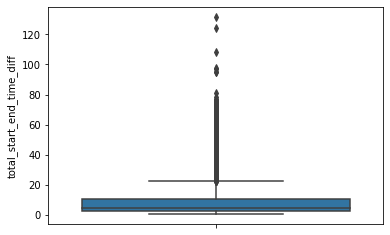

In [88]:
sns.boxplot(data=final_df, y="total_start_end_time_diff")

<AxesSubplot:ylabel='start_scan_to_end_scan'>

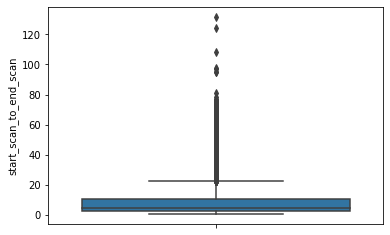

In [89]:
sns.boxplot(data=final_df, y="start_scan_to_end_scan")

In [90]:
q1=final_df["segment_osrm_time"].quantile(0.25)
q3=final_df["segment_osrm_time"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["segment_osrm_time"]<q1-1.5*iqr)|(final_df["segment_osrm_time"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
13,trip-153671121411074590,FTL,Hyderabad Anantapur,Anantapur Bengaluru,Telangana Andhra Pradesh,Andhra Pradesh Karnataka,623.3792,474.446597,542.0812,8.200000,7.133333,13.366667,13.483333,16.603617,16.583333,[thanos::sroute:fd23d4f1-012f-4247-80e9-506d32...
39,trip-153671320412492075,FTL,Bengaluru Kurnool,Kurnool Hyderabad,Karnataka Andhra Pradesh,Andhra Pradesh Telangana,596.8154,472.046507,546.2340,7.850000,7.166667,12.200000,12.316667,15.282353,15.266667,[thanos::sroute:884325ef-09d8-45fb-b62e-c0fb8d...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [91]:
q1=final_df["osrm_time"].quantile(0.25)
q3=final_df["osrm_time"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["osrm_time"]<q1-1.5*iqr)|(final_df["osrm_time"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
13,trip-153671121411074590,FTL,Hyderabad Anantapur,Anantapur Bengaluru,Telangana Andhra Pradesh,Andhra Pradesh Karnataka,623.3792,474.446597,542.0812,8.200000,7.133333,13.366667,13.483333,16.603617,16.583333,[thanos::sroute:fd23d4f1-012f-4247-80e9-506d32...
39,trip-153671320412492075,FTL,Bengaluru Kurnool,Kurnool Hyderabad,Karnataka Andhra Pradesh,Andhra Pradesh Telangana,596.8154,472.046507,546.2340,7.850000,7.166667,12.200000,12.316667,15.282353,15.266667,[thanos::sroute:884325ef-09d8-45fb-b62e-c0fb8d...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [92]:
q1=final_df["segment_actual_time"].quantile(0.25)
q3=final_df["segment_actual_time"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["segment_actual_time"]<q1-1.5*iqr)|(final_df["segment_actual_time"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
20,trip-153671186247781647,Carting,Kanpur Unnao,Unnao Kanpur,Uttar Pradesh,Uttar Pradesh,97.0273,74.563186,93.6809,1.516667,1.133333,14.050000,14.083333,17.774678,17.766667,[thanos::sroute:ba05c968-4aad-49ce-bf38-214694...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
43,trip-153671328307356992,FTL,Delhi,Bhiwandi,Delhi,Maharashtra,1472.7442,1114.040246,1367.6887,18.850000,16.616667,32.716667,33.066667,38.383259,38.366667,[thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...
14770,trip-153860880135634048,FTL,Dhule Sakri Nandurbar Shahada Shirpur,Sakri Nandurbar Shahada Shindkheda Dhule,Maharashtra,Maharashtra,253.9858,213.433340,253.9858,3.066667,3.083333,21.533333,21.550000,22.440652,22.400000,[thanos::sroute:fa162108-2072-4afd-9ec9-6cbadc...
14794,trip-153861007249500192,FTL,Muzaffrpur Darbhanga Benipur Jhanjharpur,Darbhanga Benipur Jhanjharpur Muzaffrpur,Bihar,Bihar,232.5811,194.552260,229.2052,2.966667,2.966667,14.083333,14.116667,16.991449,16.950000,[thanos::sroute:6b53909c-62c8-4c16-8ea1-c74685...


In [93]:
q1=final_df["actual_time"].quantile(0.25)
q3=final_df["actual_time"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["actual_time"]<q1-1.5*iqr)|(final_df["actual_time"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
20,trip-153671186247781647,Carting,Kanpur Unnao,Unnao Kanpur,Uttar Pradesh,Uttar Pradesh,97.0273,74.563186,93.6809,1.516667,1.133333,14.050000,14.083333,17.774678,17.766667,[thanos::sroute:ba05c968-4aad-49ce-bf38-214694...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
43,trip-153671328307356992,FTL,Delhi,Bhiwandi,Delhi,Maharashtra,1472.7442,1114.040246,1367.6887,18.850000,16.616667,32.716667,33.066667,38.383259,38.366667,[thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...
14770,trip-153860880135634048,FTL,Dhule Sakri Nandurbar Shahada Shirpur,Sakri Nandurbar Shahada Shindkheda Dhule,Maharashtra,Maharashtra,253.9858,213.433340,253.9858,3.066667,3.083333,21.533333,21.550000,22.440652,22.400000,[thanos::sroute:fa162108-2072-4afd-9ec9-6cbadc...
14794,trip-153861007249500192,FTL,Muzaffrpur Darbhanga Benipur Jhanjharpur,Darbhanga Benipur Jhanjharpur Muzaffrpur,Bihar,Bihar,232.5811,194.552260,229.2052,2.966667,2.966667,14.083333,14.116667,16.991449,16.950000,[thanos::sroute:6b53909c-62c8-4c16-8ea1-c74685...


In [94]:
q1=final_df["total_start_end_time_diff"].quantile(0.25)
q3=final_df["total_start_end_time_diff"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["total_start_end_time_diff"]<q1-1.5*iqr)|(final_df["total_start_end_time_diff"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
43,trip-153671328307356992,FTL,Delhi,Bhiwandi,Delhi,Maharashtra,1472.7442,1114.040246,1367.6887,18.850000,16.616667,32.716667,33.066667,38.383259,38.366667,[thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064...
62,trip-153671547254076660,FTL,Hyderabad Choutuppal Miryalguda Vijayawada Kha...,Choutuppal Miryalguda Vijayawada Khammam Surya...,Telangana Andhra Pradesh,Telangana Andhra Pradesh,766.4318,543.049566,715.4801,10.333333,8.783333,16.333333,16.466667,29.921330,29.866667,[thanos::sroute:2a713f58-e06f-4251-a6f0-f37437...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,trip-153860451596867762,FTL,Kolkata Bongaon Helencha,Bongaon Helencha Kolkata,West Bengal,West Bengal,197.2656,160.064801,197.2657,2.416667,2.416667,22.366667,22.366667,24.298455,24.266667,[thanos::sroute:45149f75-7ccc-4a66-8feb-4137a0...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [95]:
q1=final_df["start_scan_to_end_scan"].quantile(0.25)
q3=final_df["start_scan_to_end_scan"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["start_scan_to_end_scan"]<q1-1.5*iqr)|(final_df["start_scan_to_end_scan"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
43,trip-153671328307356992,FTL,Delhi,Bhiwandi,Delhi,Maharashtra,1472.7442,1114.040246,1367.6887,18.850000,16.616667,32.716667,33.066667,38.383259,38.366667,[thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064...
62,trip-153671547254076660,FTL,Hyderabad Choutuppal Miryalguda Vijayawada Kha...,Choutuppal Miryalguda Vijayawada Khammam Surya...,Telangana Andhra Pradesh,Telangana Andhra Pradesh,766.4318,543.049566,715.4801,10.333333,8.783333,16.333333,16.466667,29.921330,29.866667,[thanos::sroute:2a713f58-e06f-4251-a6f0-f37437...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,trip-153860451596867762,FTL,Kolkata Bongaon Helencha,Bongaon Helencha Kolkata,West Bengal,West Bengal,197.2656,160.064801,197.2657,2.416667,2.416667,22.366667,22.366667,24.298455,24.266667,[thanos::sroute:45149f75-7ccc-4a66-8feb-4137a0...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [96]:
q1=final_df["segment_osrm_distance"].quantile(0.25)
q3=final_df["segment_osrm_distance"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["segment_osrm_distance"]<q1-1.5*iqr)|(final_df["segment_osrm_distance"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
13,trip-153671121411074590,FTL,Hyderabad Anantapur,Anantapur Bengaluru,Telangana Andhra Pradesh,Andhra Pradesh Karnataka,623.3792,474.446597,542.0812,8.200000,7.133333,13.366667,13.483333,16.603617,16.583333,[thanos::sroute:fd23d4f1-012f-4247-80e9-506d32...
39,trip-153671320412492075,FTL,Bengaluru Kurnool,Kurnool Hyderabad,Karnataka Andhra Pradesh,Andhra Pradesh Telangana,596.8154,472.046507,546.2340,7.850000,7.166667,12.200000,12.316667,15.282353,15.266667,[thanos::sroute:884325ef-09d8-45fb-b62e-c0fb8d...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [97]:
q1=final_df["actual_distance_to_destination"].quantile(0.25)
q3=final_df["actual_distance_to_destination"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["actual_distance_to_destination"]<q1-1.5*iqr)|(final_df["actual_distance_to_destination"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
13,trip-153671121411074590,FTL,Hyderabad Anantapur,Anantapur Bengaluru,Telangana Andhra Pradesh,Andhra Pradesh Karnataka,623.3792,474.446597,542.0812,8.200000,7.133333,13.366667,13.483333,16.603617,16.583333,[thanos::sroute:fd23d4f1-012f-4247-80e9-506d32...
39,trip-153671320412492075,FTL,Bengaluru Kurnool,Kurnool Hyderabad,Karnataka Andhra Pradesh,Andhra Pradesh Telangana,596.8154,472.046507,546.2340,7.850000,7.166667,12.200000,12.316667,15.282353,15.266667,[thanos::sroute:884325ef-09d8-45fb-b62e-c0fb8d...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [98]:
q1=final_df["osrm_distance"].quantile(0.25)
q3=final_df["osrm_distance"].quantile(0.75)
iqr=q3-q1
outliers=final_df[(final_df["osrm_distance"]<q1-1.5*iqr)|(final_df["osrm_distance"]>q3+1.5*iqr)]
outliers

,trip_uuid,route_type,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...
2,trip-153671043369099517,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...
13,trip-153671121411074590,FTL,Hyderabad Anantapur,Anantapur Bengaluru,Telangana Andhra Pradesh,Andhra Pradesh Karnataka,623.3792,474.446597,542.0812,8.200000,7.133333,13.366667,13.483333,16.603617,16.583333,[thanos::sroute:fd23d4f1-012f-4247-80e9-506d32...
39,trip-153671320412492075,FTL,Bengaluru Kurnool,Kurnool Hyderabad,Karnataka Andhra Pradesh,Andhra Pradesh Telangana,596.8154,472.046507,546.2340,7.850000,7.166667,12.200000,12.316667,15.282353,15.266667,[thanos::sroute:884325ef-09d8-45fb-b62e-c0fb8d...
41,trip-153671321710455800,FTL,Bhiwandi,Gurgaon,Maharashtra,Haryana,1360.3053,1078.198022,1322.5269,16.716667,16.133333,34.550000,34.833333,38.973003,38.966667,[thanos::sroute:951d77aa-4725-4c4e-882d-42acc3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,trip-153860570045461434,FTL,Gurgaon,Ranchi,Haryana,Jharkhand,1288.2827,1010.705671,1192.7552,15.916667,14.183333,26.800000,27.083333,34.190984,34.183333,[thanos::sroute:870bead8-6c8a-458f-b4d8-658de4...
14750,trip-153860698042160875,FTL,Bhiwandi Sonipat,Sonipat Chandigarh,Maharashtra Haryana,Haryana Punjab,1747.4544,1322.324743,1607.8305,22.483333,19.433333,32.983333,33.383333,44.352201,44.333333,[thanos::sroute:67c77992-49e3-4594-9a75-9861ef...
14764,trip-153860840187622919,FTL,Amravati Akola,Akola Bhiwandi,Maharashtra,Maharashtra,666.8525,527.909125,644.4479,7.783333,7.733333,18.750000,18.883333,20.796415,20.766667,[thanos::sroute:34f33bf4-fb8c-476b-91fe-007dcd...
14769,trip-153860879439383883,FTL,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2600.9869,1934.334145,2370.6136,33.266667,28.983333,54.466667,55.116667,73.513938,73.500000,[thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc9...


In [99]:
cat_var = pd.get_dummies(final_df, columns = ["route_type"]) #encoding a categorical column
cat_var

,trip_uuid,city_source_name,city_dest_name,state_source_name,state_dest_name,segment_osrm_distance,actual_distance_to_destination,osrm_distance,segment_osrm_time,osrm_time,segment_actual_time,actual_time,total_start_end_time_diff,start_scan_to_end_scan,route_schedule_uuid,route_type_Carting,route_type_FTL
0,trip-153671041653548748,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,1320.4733,824.732854,991.3523,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,[thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc...,0,1
1,trip-153671042288605164,Tumkur Doddablpur,Doddablpur Chikblapur,Karnataka,Karnataka,84.1894,73.186911,85.1110,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,[thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c...,1,0
2,trip-153671043369099517,Bengaluru Gurgaon,Gurgaon Chandigarh,Karnataka Haryana,Haryana Punjab,2545.2678,1932.273969,2372.0852,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,[thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1...,0,1
3,trip-153671046011330457,Mumbai,Mumbai,Hub Maharashtra,Maharashtra,19.8766,17.175274,19.6800,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,[thanos::sroute:f0176492-a679-4597-8332-bbd1c7...,1,0
4,trip-153671052974046625,Bellary Hospet Sandur,Hospet Sandur Bellary,Karnataka,Karnataka,146.7919,127.448500,146.7918,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,[thanos::sroute:d9f07b12-65e0-4f3b-bec8-df0613...,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Chandigarh,Zirakpur Chandigarh,Punjab Chandigarh,Punjab,64.8551,57.762332,73.4630,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,[thanos::sroute:8a120994-f577-4491-9e4b-b7e4a1...,1,0
14813,trip-153861104386292051,FBD,Faridabad,Haryana,Haryana,16.0883,15.513784,16.0882,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,[thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b7576...,1,0
14814,trip-153861106442901555,Kanpur,Kanpur,Uttar Pradesh,Uttar Pradesh,104.8866,38.684839,63.2841,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,[thanos::sroute:5609c268-e436-4e0a-8180-3db4a7...,1,0
14815,trip-153861115439069069,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tamil Nadu,Tamil Nadu,223.5324,134.723836,177.6635,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,[thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6...,1,0


In [100]:
from sklearn.preprocessing import MinMaxScaler #normalizing the data
scaler = MinMaxScaler()
data_min_max = scaler.fit_transform(cat_var[["segment_osrm_time","osrm_time","segment_actual_time","actual_time",
 "total_start_end_time_diff","start_scan_to_end_scan","segment_osrm_distance","actual_distance_to_destination",
 "osrm_distance"]])

In [101]:
data_min_max

array([[0.39171228, 0.36377098, 0.24738788, ..., 0.37313365, 0.37444907,
        0.3469716 ],
       [0.02306489, 0.03060217, 0.02121845, ..., 0.02137295, 0.02946293,
        0.02685902],
       [0.75645035, 0.85636723, 0.53030059, ..., 0.72162526, 0.88284958,
        0.83468935],
       ...,
       [0.03205629, 0.023692  , 0.04372287, ..., 0.02726194, 0.01362526,
        0.01914908],
       [0.08405004, 0.08785785, 0.04002572, ..., 0.06102031, 0.05771055,
        0.05955144],
       [0.02384676, 0.03060217, 0.04259765, ..., 0.02034559, 0.02620131,
        0.02525807]])

In [102]:
highest_trips = df1.groupby(["city_source_name","city_dest_name"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
highest_trips.head(5)

,city_source_name,city_dest_name,trip_uuid
0,Bengaluru,Bengaluru,1369
1,Mumbai,Mumbai,588
2,Bhiwandi,Mumbai,512
3,Mumbai,Bhiwandi,345
4,Hyderabad,Hyderabad,308


In [103]:
Busiest_corridor= final_df[["city_source_name","city_dest_name","actual_distance_to_destination"]].head(5).sort_values(by="actual_distance_to_destination" ,ascending=False)
Busiest_corridor

,city_source_name,city_dest_name,actual_distance_to_destination
2,Bengaluru Gurgaon,Gurgaon Chandigarh,1932.273969
0,Bhopal Kanpur,Kanpur Gurgaon,824.732854
4,Bellary Hospet Sandur,Hospet Sandur Bellary,127.448500
1,Tumkur Doddablpur,Doddablpur Chikblapur,73.186911
3,Mumbai,Mumbai,17.175274


In [104]:
highest_order_between_states=df.groupby(["city_source_name","city_dest_name"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()

In [105]:
highest_order_between_states.head(5)

,city_source_name,city_dest_name,trip_uuid
0,Bengaluru,Bengaluru,1369
1,Mumbai,Mumbai,588
2,Bhiwandi,Mumbai,512
3,Mumbai,Bhiwandi,345
4,Hyderabad,Hyderabad,308


In [106]:
avg_distance=df.groupby(["city_source_name","city_dest_name"])["actual_distance_to_destination"].nunique().sort_values(ascending=False).reset_index()

In [107]:
avg_distance.head(5)

,city_source_name,city_dest_name,actual_distance_to_destination
0,Bengaluru,Bengaluru,5055
1,Gurgaon,Bengaluru,4976
2,Bengaluru,Gurgaon,3394
3,Gurgaon,Kolkata,2862
4,Gurgaon,Hyderabad,1639


In [112]:
max_creation_time_start_to_end_scan=df.groupby(["day_creation","route_type"])["start_scan_to_end_scan"].nunique().sort_values(ascending=False).reset_index()

In [115]:
max_creation_time_start_to_end_scan.head(10) #top10 maximum time for a route type on a particular day

,day_creation,route_type,start_scan_to_end_scan
0,Wednesday,FTL,900
1,Saturday,FTL,781
2,Thursday,FTL,763
3,Sunday,FTL,760
4,Monday,FTL,758
5,Friday,FTL,752
6,Tuesday,FTL,749
7,Wednesday,Carting,467
8,Friday,Carting,434
9,Thursday,Carting,433


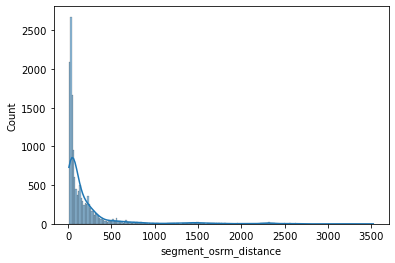

In [108]:
sns.histplot(data=final_df,x="segment_osrm_distance",kde=True) #histograms for a few unique attributes
plt.show()

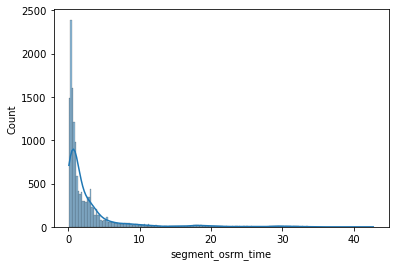

In [109]:
sns.histplot(data=final_df,x="segment_osrm_time",kde=True)
plt.show()

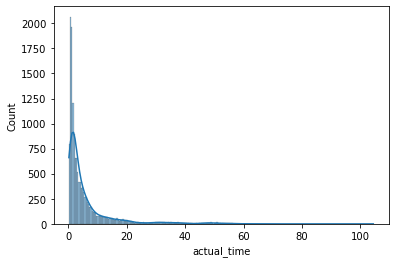

In [110]:
sns.histplot(data=final_df,x="actual_time",kde=True)
plt.show()

In [116]:
df1["city_source_name"].nunique()

1239

In [117]:
df["city_dest_name"].nunique()

1238

In [118]:
df["state_source_name"].nunique()

54